In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv("/content/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


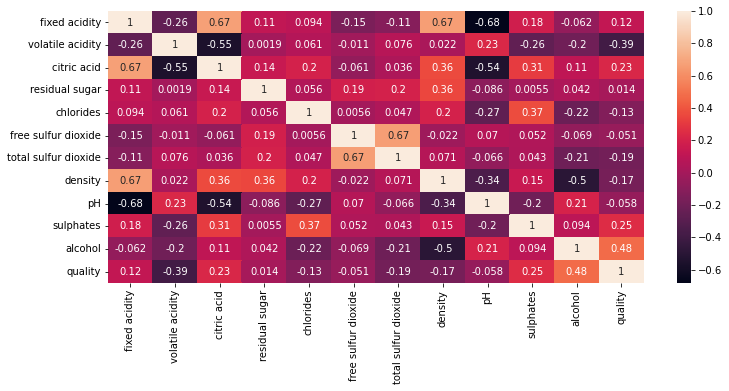

In [5]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [6]:
#seperating features and target
feature = df.drop(['quality'],axis = 1)
target = df['quality']
x=feature
y=target

In [7]:
#check the precentage for labels in target column
target_count = y.value_counts()
target_per = target_count * 100 / target_count.sum()
print(round(target_per, 2))

5    42.59
6    39.90
7    12.45
4     3.31
8     1.13
3     0.63
Name: quality, dtype: float64


In [8]:
#upsampeling
over = SMOTE()
ox,oy = over.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [9]:
#create new sample dataframe
new_x = pd.DataFrame(ox)
new_y = pd.Series(oy)
new_df = pd.concat([new_x , new_y], axis = 1)
new_df.columns = df.columns
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
print("No of items in original DF : ",len(df))
print("No of items in new DF : ",len(new_x))

No of items in original DF :  1599
No of items in new DF :  4086


In [11]:
#split data into train test
x = new_df.drop(['quality'],axis = 1)
y = new_df['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2  , stratify = y )

In [12]:
# Standarding values.
sa = StandardScaler()
new_x_train = sa.fit_transform(x_train)
new_x_test = sa.fit_transform(x_test)

In [13]:
# Create Logistic Regression model.
 
#model = LogisticRegression(max_iter=10000, multi_class="ovr", n_jobs=-1)
model = LogisticRegression(max_iter=10000)
model.fit(new_x_train, y_train)
print("Training metrics =>", model.score(new_x_train, y_train))
print("Testing metrics =>", model.score(new_x_test, y_test))
y_pred = model.predict(new_x_test)
print("\n\n")

Training metrics => 0.6040391676866586
Testing metrics => 0.5904645476772616





In [14]:
# Polynomial eq
 
degree = 3
print("degree =>", degree)
 
poly = PolynomialFeatures(degree=degree,include_bias=False)
new_x_train = poly.fit_transform(new_x_train)
new_x_test = poly.fit_transform(new_x_test)
 
print("Number of feature =>", new_x_test.shape[1])
 
#pmodel = LogisticRegression(max_iter=100, multi_class="ovr", n_jobs=-1, verbose=1)
pmodel = LogisticRegression(max_iter=10000)
pmodel.fit(new_x_train, y_train)
print("Training metrics =>", pmodel.score(new_x_train, y_train))
print("Testing metrics =>", pmodel.score(new_x_test, y_test))
y_pred = pmodel.predict(new_x_test)
print("\n\n")
 


degree => 3
Number of feature => 363
Training metrics => 0.9326805385556916
Testing metrics => 0.8276283618581907





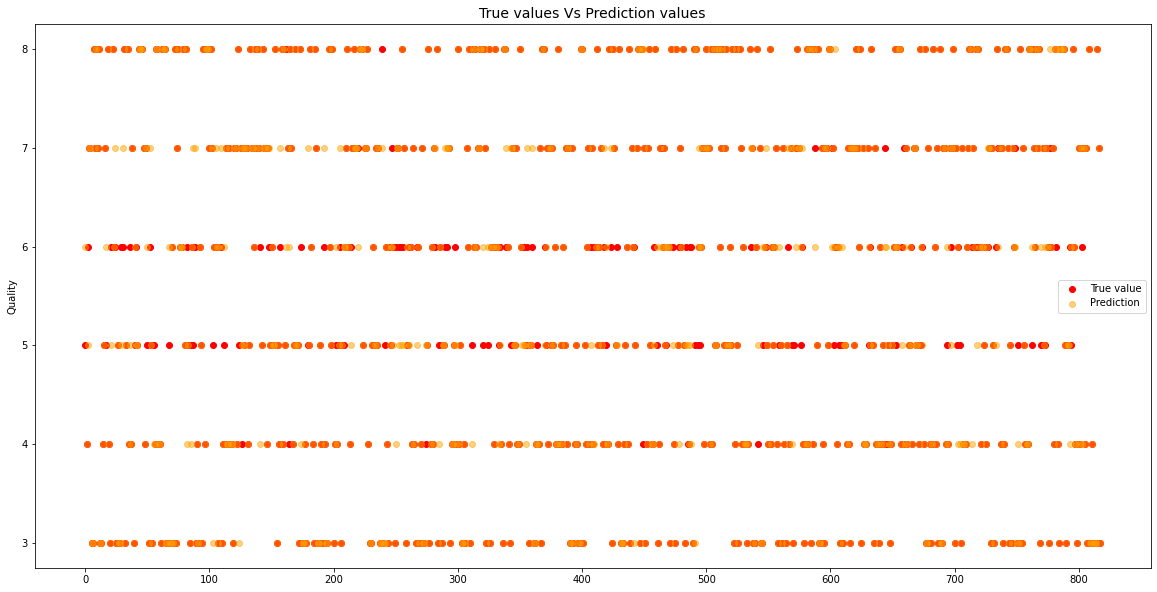

In [15]:
x_axis_values = [i for i in range(y_test.shape[0])]
 
plt.figure(figsize=(20, 10))
plt.title("True values Vs Prediction values", fontsize=14)
plt.scatter(x=x_axis_values, y=y_test, label="True value", color='red', alpha=1)
plt.scatter(x=x_axis_values, y=y_pred, label="Prediction", color='orange', alpha=0.5)
plt.ylabel("Quality")
plt.legend()
plt.show()

# Random Forest

In [16]:
# Standarding values.
sa_rf = StandardScaler()
RF_x_train = sa_rf.fit_transform(x_train)
RF_x_test = sa_rf.fit_transform(x_test)

In [17]:
# Create model
model_rf = RandomForestRegressor(max_depth=8)
model_rf.fit(RF_x_train, y_train)
#model.score(RF_x_test, y_train)

print("Training metrics =>", model_rf.score(RF_x_train, y_train))
print("Testing metrics =>", model_rf.score(RF_x_test, y_test))

y_rf_pred = model_rf.predict(RF_x_test)

Training metrics => 0.9467282628851826
Testing metrics => 0.8960513937790533


# Linear Regration

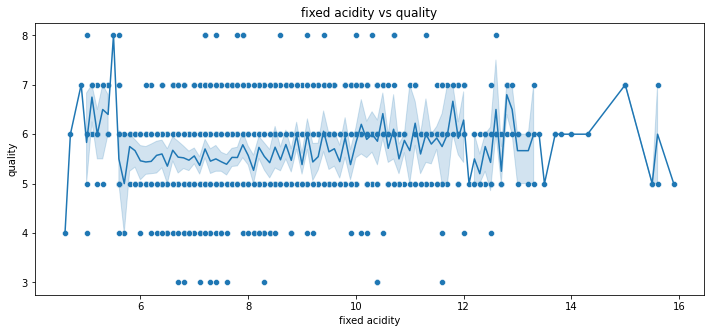

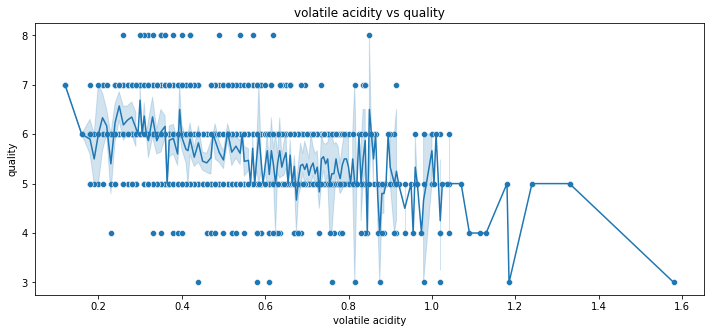

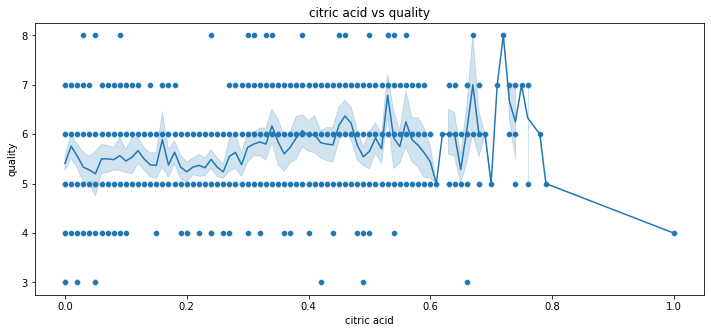

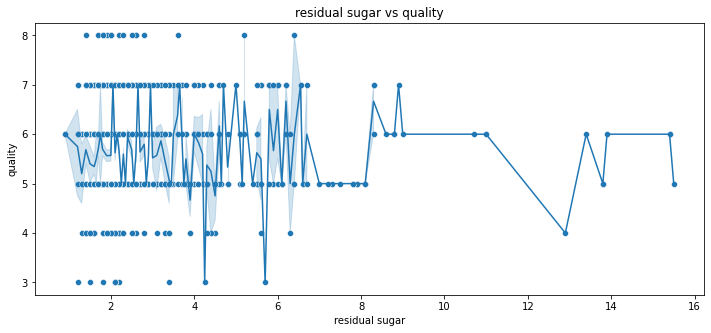

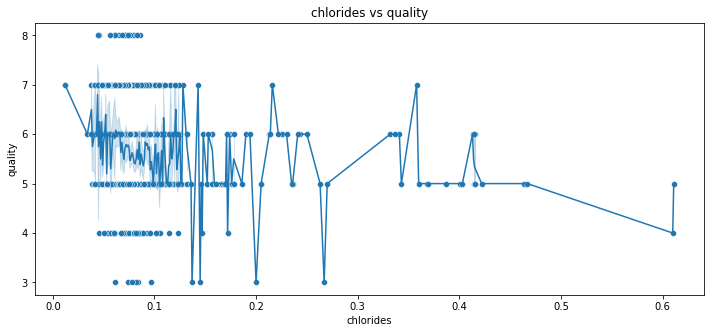

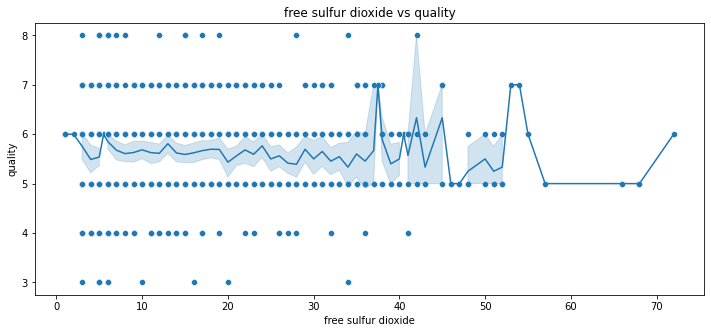

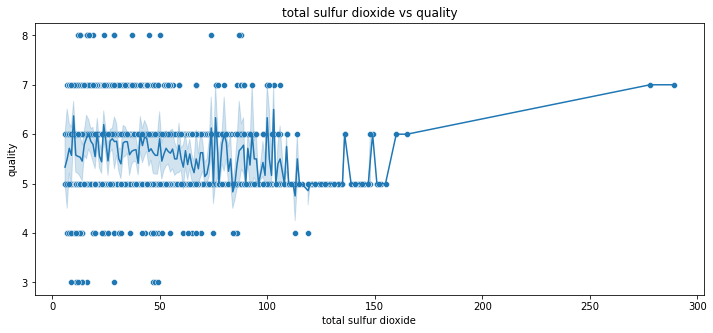

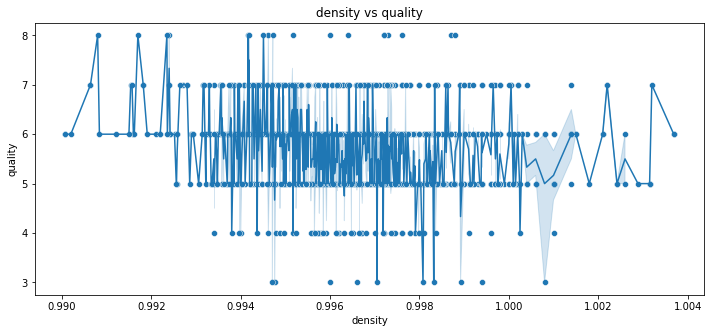

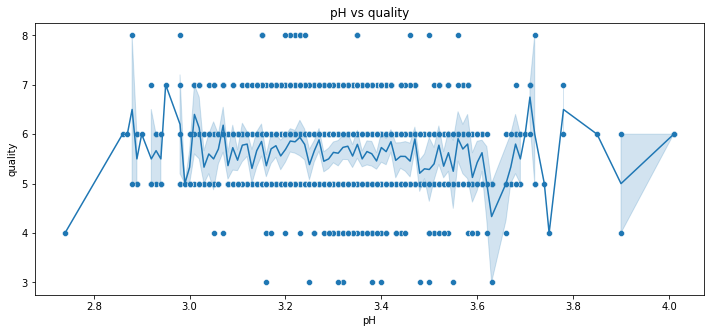

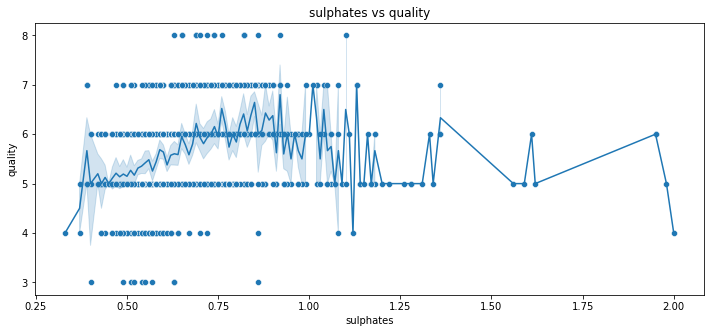

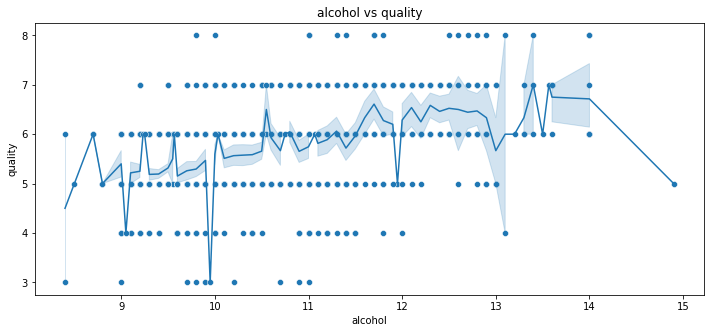

In [18]:
for i in feature:
    plt.figure(figsize=(12,5))
    plt.title(f"{i} vs quality")
    sns.scatterplot(x = i , y = 'quality' , data = df)
    sns.lineplot(x = i , y = 'quality' , data =df)
    plt.show()

In [19]:
# Standarding values.
sa_l = StandardScaler()
l_x_train = sa_l.fit_transform(x_train)
l_x_test = sa_l.fit_transform(x_test)

In [20]:
model_l = LinearRegression()
model_l.fit(l_x_train,y_train)
print("Training metrics =>", model_l.score(l_x_train, y_train))
print("Testing metrics =>", model_l.score(l_x_test, y_test))

Training metrics => 0.735338650884408
Testing metrics => 0.7262437902034253
